In [1]:
import omero
from omero.gateway import BlitzGateway

print("OMERO erfolgreich geladen!")

OMERO erfolgreich geladen!


In [2]:
import sys
print(sys.executable)

/Users/alishadicarmine/Library/Mobile Documents/com~apple~CloudDocs/Master Studium /Lab rot - Neuropatho/Week 5/Labrotation/env/bin/python


In [3]:
# Importiere das OMERO-Modul
import omero.gateway

# Verbinde dich zum OMERO-Server
conn = omero.gateway.BlitzGateway(
    username="DiCarmine",
    passwd="Leon1701!",
    host="134.76.18.202",
    port=4064,
)
connected = conn.connect()
print("Verbindung erfolgreich:", connected)


Verbindung erfolgreich: True


In [4]:
for project in conn.listProjects():
    print(f"Project: {project.getName()} (ID={project.getId()})")

ConnectionLostException: Ice.ConnectionLostException:
recv() returned zero

In [5]:
print(conn.isConnected())

True


In [6]:
for project in conn.listProjects():
    print(f"Project: {project.getName()} (ID={project.getId()})")

ConnectionLostException: Ice.ConnectionLostException:
recv() returned zero

In [7]:
if not conn.isConnected():
    conn.connect()

In [11]:
conn.close()
conn = BlitzGateway('DiCarmine', 'Leon1701!', host='134.76.18.202', port=4064)
conn.connect()

True

In [16]:
def connect_omero(max_retries=3, wait_sec=5):
    for attempt in range(max_retries):
        try:
            conn = BlitzGateway('DiCarmine', 'Leon1701!', host='134.76.18.20', port=4064)
            if not conn.connect():
                raise Exception("Verbindung fehlgeschlagen")
            print("Erfolgreich verbunden!")
            return conn
        except Exception as e:
            print(f"Verbindungsversuch {attempt + 1} fehlgeschlagen: {e}")
            time.sleep(wait_sec)
    raise ConnectionError("Konnte keine Verbindung zu OMERO herstellen.")

In [18]:
import omero.gateway

# Verbinde dich zum OMERO-Server
conn = omero.gateway.BlitzGateway(
    username="DiCarmine",
    passwd="Leon1701!",
    host="134.76.18.202",
    port=4064,
)
connected = conn.connect()
print("Verbindung erfolgreich:", connected)

Verbindung erfolgreich: True


In [19]:
def list_projects_safe(conn):
    try:
        projects = conn.listProjects()
        for project in projects:
            print(f"Project: {project.getName()} (ID={project.getId()})")
    except Exception as e:
        print(f"Fehler beim Zugriff auf Projekte: {e}")
        print("Versuche neu zu verbinden...")
        conn.close()
        conn = connect_omero()
        list_projects_safe(conn)

In [20]:
list_projects_safe(conn)

Project: Alzheimer Allgemein (ID=265)
Project: Neuropatho Daten (ID=202)
Project: CPM Oligo Story (ID=105)
Project: SkalenMikroskop (ID=301)
Project: CPM Astros (ID=377)
Project: Alzheimer Spatial Statistics (ID=364)
Project: AlzheimerTemp (ID=416)
Project: RNAse (ID=449)
Project: Alzheimer Franca (ID=704)
Project: 250422 (ID=1002)
Project: NG2_Olig2_test (ID=1054)
Project: MS_Cortical_Autopsy (ID=1079)
Project: MPG Biopsie (ID=1082)
Project: RNAscope (ID=724)
Project: LLC lesions (ID=845)
Project: KontrollFälle (ID=846)
Project: Alterskohorte (ID=874)
Project: Austestungen (ID=904)
Project: acute vs chronic EAE mice (ID=942)
Project: FGF9 (ID=1129)
Project: Aigli 20-8-2022 (ID=1114)
Project: Aigli Project (ID=1117)
Project: FFPE_single_cell (ID=1134)
Project: Nafiye (ID=1152)
Project: Dataset repeated (ID=1205)
Project: Liquor (ID=1306)
Project: C4d_CD project (ID=1308)
Project: AD_Liesong (ID=1309)
Project: FFPE_dissociation (ID=1310)
Project: Visium (ID=1355)
Project: Leukodystrophy

In [21]:
project_id = 1725
try:
    project = conn.getObject("Project", project_id)
    if project:
        print(f"Gefundenes Projekt: {project.getName()} (ID={project.getId()})")
    else:
        print(f"Projekt mit ID {project_id} existiert nicht oder ist nicht zugänglich.")
except Exception as e:
    print(f"Fehler beim Abrufen des Projekts: {e}")

Gefundenes Projekt: Xenium (ID=1725)


In [25]:
import omero.gateway

# Verbinde dich zum OMERO-Server
conn = omero.gateway.BlitzGateway(
    username="DiCarmine",
    passwd="Leon1701!",
    host="134.76.18.202",
    port=4064,
)
connected = conn.connect()
print("Verbindung erfolgreich:", connected)

Verbindung erfolgreich: True


In [26]:
project_id = 1725
project = conn.getObject("Project", project_id)

# Alle Datasets des Projekts auflisten
try:
    datasets = project.listChildren()  # gibt alle Datasets des Projekts zurück
    if datasets:
        for ds in datasets:
            print(f"Dataset: {ds.getName()} (ID={ds.getId()})")
    else:
        print("Keine Datasets in diesem Projekt gefunden.")
except Exception as e:
    print(f"Fehler beim Auflisten der Datasets: {e}")

Dataset: CTRL_SN_Sox9_Sox10 (ID=9516)
Dataset: HEs (ID=9464)
Dataset: RNAScope_Controls (ID=9336)
Dataset: run_001 (ID=8352)
Dataset: run_002 (ID=8680)
Dataset: run_003 (ID=8944)
Dataset: run_005 (ID=9274)
Dataset: run_006 (ID=9349)
Dataset: SN_CD8_CD163 (ID=9589)
Dataset: SN_p53 (ID=9623)
Dataset: SN_PD_Sox9_Sox10 (ID=9515)
Dataset: Training_run (ID=7741)


In [27]:
# Bestimmtes Bild abrufen
dataset_id = 9589
dataset = conn.getObject("Dataset", dataset_id)

image_id = 366090

try:
    # Bild per ID abrufen
    image = conn.getObject("Image", image_id)
    
    # Optional: prüfen, ob Bild tatsächlich zu diesem Dataset gehört
    if image.getParent().getId() == dataset.getId():
        print(f"Gefundenes Bild: {image.getName()} (ID={image.getId()})")
    else:
        print("Dieses Bild gehört nicht zu diesem Dataset.")
except Exception as e:
    print(f"Fehler beim Abrufen des Bildes: {e}")

Gefundenes Bild: A_2017_80_7_CD8_DAB_CD163_FB.vsi [20x_BF_01] (ID=366090)


In [29]:
# to get pixel size
image_id = 366090
size_x = image.getPixelSizeX()       
print(" Pixel Size X:", size_x)
# Units support, new in OMERO 5.1.0
size_x_obj = image.getPixelSizeX(units=True)
print(" Pixel Size X:", size_x_obj.getValue(), "(%s)" % size_x_obj.getSymbol())
# To get the size with different units, e.g. Angstroms
size_x_ang = image.getPixelSizeX(units="ANGSTROM")
print(" Pixel Size X:", size_x_ang.getValue(), "(%s)" % size_x_ang.getSymbol())

 Pixel Size X: 0.27380993872196185
 Pixel Size X: 0.27380993872196185 (µm)
 Pixel Size X: 2738.0993872196186 (Å)


In [37]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.9 MB/s eta 0:00:0031m22.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.1/270.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 12.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [71]:
from omero.gateway import BlitzGateway

conn = BlitzGateway("DiCarmine", "Leon1701!", host="134.76.18.202", port=4064, group='AG Stadelmann')
conn.connect()

True

In [73]:
image_id = 366090
image = conn.getObject("Image", image_id)  # jetzt hast du ein echtes Image-Objekt

<_ImageWrapper id=366090>
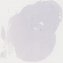

In [76]:
image

In [77]:
roi_service = conn.getRoiService()

In [78]:
roi_service

In [79]:
result = roi_service.findByImage(image_id, None)

In [80]:
result

object #0 (::omero::api::RoiResult)
{
    opts = <nil>
    rois = 
    {
        [0] = object #1 (::omero::model::Roi)
        {
            _id = object #2 (::omero::RLong)
            {
                _val = 23554005
            }
            _details = object #3 (::omero::model::Details)
            {
                _owner = object #4 (::omero::model::Experimenter)
                {
                    _id = object #5 (::omero::RLong)
                    {
                        _val = 903
                    }
                    _details = <nil>
                    _loaded = False
                    _version = <nil>
                    _groupExperimenterMapSeq = 
                    {
                    }
                    _groupExperimenterMapLoaded = False
                    _omeName = <nil>
                    _firstName = <nil>
                    _middleName = <nil>
                    _lastName = <nil>
                    _institution = <nil>
                    _lda

In [1]:
from omero.gateway import BlitzGateway

conn = BlitzGateway("DiCarmine", "Leon1701!", host="134.76.18.202", port=4064, group='AG Stadelmann')
conn.connect()

True

In [2]:
image_id = 366090
roi_service = conn.getRoiService()

In [3]:
roi_service

In [8]:
# Importiere das OMERO-Modul
import omero.gateway

# Verbinde dich zum OMERO-Server
conn = omero.gateway.BlitzGateway(
    username="DiCarmine",
    passwd="Leon1701!",
    host="134.76.18.202",
    port=4064, group = 'AG Stadelmann'
)
connected = conn.connect()
print("Verbindung erfolgreich:", connected)

Verbindung erfolgreich: True


In [9]:
image_id = 366090
image = conn.getObject("Image", image_id)  # jetzt hast du ein echtes Image-Objekt

<_ImageWrapper id=366090>
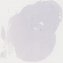

In [10]:
image

In [11]:
roi_service = conn.getRoiService()

In [12]:
roi_service

In [14]:
result = roi_service.findByImage(image_id, None)

In [15]:
result

object #0 (::omero::api::RoiResult)
{
    opts = <nil>
    rois = 
    {
        [0] = object #1 (::omero::model::Roi)
        {
            _id = object #2 (::omero::RLong)
            {
                _val = 23554005
            }
            _details = object #3 (::omero::model::Details)
            {
                _owner = object #4 (::omero::model::Experimenter)
                {
                    _id = object #5 (::omero::RLong)
                    {
                        _val = 903
                    }
                    _details = <nil>
                    _loaded = False
                    _version = <nil>
                    _groupExperimenterMapSeq = 
                    {
                    }
                    _groupExperimenterMapLoaded = False
                    _omeName = <nil>
                    _firstName = <nil>
                    _middleName = <nil>
                    _lastName = <nil>
                    _institution = <nil>
                    _lda

In [16]:
rois = result.rois
print(f"Anzahl gefundener ROIs: {len(rois)}")

Anzahl gefundener ROIs: 90


In [17]:
for roi in rois:
    roi_id = roi.getId().getValue()
    print(f"\nROI ID: {roi_id}")


ROI ID: 23554005

ROI ID: 23554021

ROI ID: 23554022

ROI ID: 23554023

ROI ID: 23554036

ROI ID: 23554037

ROI ID: 23554038

ROI ID: 23554039

ROI ID: 23554040

ROI ID: 23554041

ROI ID: 23554042

ROI ID: 23554043

ROI ID: 23554044

ROI ID: 23554045

ROI ID: 23554046

ROI ID: 23554047

ROI ID: 23554048

ROI ID: 23554049

ROI ID: 23554051

ROI ID: 23554052

ROI ID: 23554053

ROI ID: 23554054

ROI ID: 23554055

ROI ID: 23554056

ROI ID: 23554058

ROI ID: 23554059

ROI ID: 23554060

ROI ID: 23554061

ROI ID: 23554062

ROI ID: 23554063

ROI ID: 23554065

ROI ID: 23554066

ROI ID: 23554067

ROI ID: 23554069

ROI ID: 23554070

ROI ID: 23554071

ROI ID: 23554073

ROI ID: 23554074

ROI ID: 23554075

ROI ID: 23554076

ROI ID: 23554077

ROI ID: 23554078

ROI ID: 23554079

ROI ID: 23554080

ROI ID: 23554081

ROI ID: 23554082

ROI ID: 23554083

ROI ID: 23554084

ROI ID: 23554085

ROI ID: 23554086

ROI ID: 23554087

ROI ID: 23554088

ROI ID: 23554089

ROI ID: 23554090

ROI ID: 23554091

ROI ID: 2

In [18]:
 for shape in roi.copyShapes():
        shape_type = shape.__class__.__name__
        shape_id = shape.getId().getValue()
        print(f"  Shape ID: {shape_id}, Typ: {shape_type}")

  Shape ID: 23554480, Typ: PointI


In [31]:
if shape_type == "PolygonI":
            points = shape.getPoints().getValue()  # "x1,y1 x2,y2 x3,y3 ..."
            print(f"    Polygon-Punkte: {points}")
elif shape_type == "RectangleI":
            print(f"    X={shape.getX().getValue()}, Y={shape.getY().getValue()}, "
                  f"Breite={shape.getWidth().getValue()}, Höhe={shape.getHeight().getValue()}")
elif shape_type == "PointI":
            print(f"    Punkt: ({shape.getX().getValue()}, {shape.getY().getValue()})")

    Punkt: (49606.72141865157, 49476.02631006039)


In [32]:
for roi in rois:
    print(f"\nROI ID: {roi.getId()}")

    # Shapes in der ROI abrufen
    for shape in roi.copyShapes():
        shape_type = shape.__class__.__name__

        # Nur echte Polygone
        if shape_type == "PolygonI":
            points_str = shape.getPoints().getValue()  # z.B. "x1,y1 x2,y2 x3,y3"
            
            # In x- und y-Listen umwandeln
            coords = [tuple(map(float, p.split(','))) for p in points_str.split()]
            x_coords, y_coords = zip(*coords)
            
            print("Polygon-Koordinaten:")
            print("X:", x_coords)
            print("Y:", y_coords)


ROI ID: object #0 (::omero::RLong)
{
    _val = 23554005
}
Polygon-Koordinaten:
X: (60355.47760689865, 58767.97913224167, 47800.57580349356, 43102.07690737105, 36989.48056836633, 37568.54800357006, 40466.36756998258, 48728.431717241154, 60688.36877079206, 62704.928079432124)
Y: (47221.71397459721, 42747.926077800716, 36381.173439876155, 5845.639941404252, 5713.660786856605, 35556.269109155866, 45202.58605766402, 50374.32415316701, 53107.952218226215, 53497.99803078536)

ROI ID: object #0 (::omero::RLong)
{
    _val = 23554021
}

ROI ID: object #0 (::omero::RLong)
{
    _val = 23554022
}

ROI ID: object #0 (::omero::RLong)
{
    _val = 23554023
}

ROI ID: object #0 (::omero::RLong)
{
    _val = 23554036
}

ROI ID: object #0 (::omero::RLong)
{
    _val = 23554037
}

ROI ID: object #0 (::omero::RLong)
{
    _val = 23554038
}

ROI ID: object #0 (::omero::RLong)
{
    _val = 23554039
}

ROI ID: object #0 (::omero::RLong)
{
    _val = 23554040
}

ROI ID: object #0 (::omero::RLong)
{
    _va

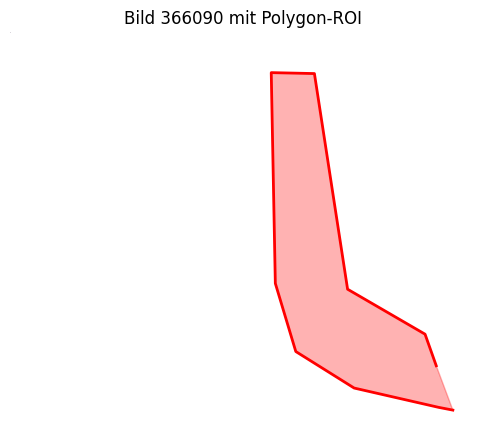

In [37]:
import matplotlib.pyplot as plt
from PIL import Image
import io
import numpy as np
from omero.gateway import BlitzGateway

# --- Verbindung zu OMERO ---
conn = BlitzGateway("DiCarmine", "Leon1701!", host="134.76.18.202", port=4064, group = 'AG Stadelmann')
conn.connect()

# --- Bild abrufen ---
image_id = 366090
image = conn.getObject("Image", image_id)

# --- Thumbnail abrufen und in NumPy-Array konvertieren ---
thumb_bytes = image.getThumbnail()              # Bytes vom Server
thumb = Image.open(io.BytesIO(thumb_bytes))     # Pillow Image öffnen
thumb_array = np.array(thumb)                   # In NumPy Array umwandeln

# --- Beispiel: Polygon-Koordinaten ---
# x_coords, y_coords müssen vorher aus PolygonI extrahiert worden sein
# Beispiel:
x_coords = [60355.47760689865, 58767.97913224167, 47800.57580349356, 43102.07690737105, 36989.48056836633, 37568.54800357006, 40466.36756998258, 48728.431717241154, 60688.36877079206, 62704.928079432124]
y_coords = [47221.71397459721, 42747.926077800716, 36381.173439876155, 5845.639941404252, 5713.660786856605, 35556.269109155866, 45202.58605766402, 50374.32415316701, 53107.952218226215, 53497.99803078536]

# --- Visualisierung ---
plt.figure(figsize=(6,6))
plt.imshow(thumb_array, cmap='gray')
plt.plot(x_coords, y_coords, color='red', linewidth=2)  # Polygon zeichnen
plt.fill(x_coords, y_coords, color='red', alpha=0.3)    # Polygon füllen (optional)
plt.axis('off')
plt.title(f"Bild {image_id} mit Polygon-ROI")
plt.show()

In [38]:
git status

SyntaxError: invalid syntax (3528599804.py, line 1)

In [39]:
git commit -m "Update: Polygon-ROI Visualisierung und Thumbnail-Laden"

SyntaxError: invalid syntax (248632029.py, line 1)